# Don’t Overfit II: The Overfitting

<b>Description:</b><br>
1. One of the primary goals of predictive modelling is to create a model that can make
accurate predictions based on previously unknown data. Checking that models haven't
overfitted the training data, which can lead to suboptimal predictions on new data, is an
essential stage in the modelling process. 
2. Overfitting occurs when a model performs well with training data but fails miserably with
test data. There are numerous reasons for overfitting, but we'd like to highlight a few of
the most significant. The first is that training samples have fewer data points, the
second is that the dataset is unbalanced, and the third, and most importantly, is that the
model is complex. 
3. We'll try out practically all of the machine learning strategies available to avoid
overfitting in a dataset from a Kaggle competition called Don't Overfit II. This challenge
aims to highlight existing algorithms, approaches, or tactics for avoiding overfitting. 

<b>Dataset:</b><br>
Dataset can be downloaded from https://www.kaggle.com/c/dont-overfit-ii/data.<br>
The datasets consist of- <br>
<ul>
• train.csv- This file consists of id, numerous continuous features whose meaning
are not explicit and also the binary target which we have to predict. <br>
• test.csv- This file consists of id, and numerous continuous features whose
meanings are not explicit.<br>
</ul>

<b>Problem Statement:</b><br>
The objective is given 250 data points and 300 columns in the training dataset; we have
to create a model that accurately predicts the binary target for 19750 unknown data
points in the test dataset without overfitting. <br>

<b>Evaluation:</b><br>
This is basically a classification problem. The metric for evaluation is provided as
AUCROC between the predicted target and the actual target value. So, we will be
working with AUCROC as a metric.

## Table of Contents
<ol>
    1. Import relevant libraries and load the dataset.<br>
    2. Plotting for Exploratory Data Analysis (EDA).<br>
    3. Feature Transformation. <br>
    4. Featurization and Feature Engineering. <br>
    5. Dimensionality Reduction. <br>
    6. Data Scaling. <br>
    7. Apply Machine Learning Models.
</ol>

## 1. Import relevant libraries and load dataset.

In [2]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import plotly.express as px
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from seaborn_qqplot import pplot 

In [3]:
# load train.csv into pandas dataframe
train_df = pd.read_csv("train.csv")
# print the first 5 rows
train_df.head()

id  target      0      1      2      3      4      5      6      7  ...  \
0   0     1.0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276  ...   
1   1     0.0  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  ...   
2   2     1.0 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  ...   
3   3     1.0  0.067 -0.021  0.392 -1.637 -0.446 -0.725 -1.035  0.834  ...   
4   4     1.0  2.347 -0.831  0.511 -0.021  1.225  1.594  0.585  1.509  ...   

     290    291    292    293    294    295    296    297    298    299  
0  0.867  1.347  0.504 -0.649  0.672 -2.097  1.051 -0.414  1.038 -1.065  
1 -0.165 -1.695 -1.257  1.359 -0.808 -1.624 -0.458 -1.099 -0.936  0.973  
2  0.013  0.263 -1.222  0.726  1.444 -1.165 -1.544  0.004  0.800 -1.211  
3 -0.404  0.640 -0.595 -0.966  0.900  0.467 -0.562 -0.254 -0.533  0.238  
4  0.898  0.134  2.415 -0.996 -1.006  1.378  1.246  1.478  0.428  0.253  

[5 rows x 302 columns]

In [4]:
# load test.csv into pandas dataframe
test_df = pd.read_csv("test.csv")
# print the first 5 rows
test_df.head()

id      0      1      2      3      4      5      6      7      8  ...  \
0  250  0.500 -1.033 -1.595  0.309 -0.714  0.502  0.535 -0.129 -0.687  ...   
1  251  0.776  0.914 -0.494  1.347 -0.867  0.480  0.578 -0.313  0.203  ...   
2  252  1.750  0.509 -0.057  0.835 -0.476  1.428 -0.701 -2.009 -1.378  ...   
3  253 -0.556 -1.855 -0.682  0.578  1.592  0.512 -1.419  0.722  0.511  ...   
4  254  0.754 -0.245  1.173 -1.623  0.009  0.370  0.781 -1.763 -1.432  ...   

     290    291    292    293    294    295    296    297    298    299  
0 -0.088 -2.628 -0.845  2.078 -0.277  2.132  0.609 -0.104  0.312  0.979  
1 -0.683 -0.066  0.025  0.606 -0.353 -1.133 -3.138  0.281 -0.625 -0.761  
2 -0.094  0.351 -0.607 -0.737 -0.031  0.701  0.976  0.135 -1.327  2.463  
3 -0.336 -0.787  0.255 -0.031 -0.836  0.916  2.411  1.053 -1.601 -1.529  
4  2.184 -1.090  0.216  1.186 -0.143  0.322 -0.068 -0.156 -1.153  0.825  

[5 rows x 301 columns]

## 2. Plotting for Exploratory Data Analysis (EDA)

### 2.1  Number datapoints and features in the dataset.

In [5]:
# how many datapoints and features present in train and test dataset
print("Training Dataset:",train_df.shape)
print("Test Dataset    :",test_df.shape)

Training Dataset: (250, 302)
Test Dataset    : (19750, 301)


In [6]:
# how many null values present in the train dataset
train_df.isnull().values.any()

False

Observations:
<ol>
    1.Training dataset consists of 250 datapoints and 302 features.<br>
    2.Test dataset consists of 19750 datapoints and 301 features.<br>
    3.There are no null values present in the training dataset.
</ol>

### 2.2 Concise summary of dataframe.

In [7]:
# description of the training dataset in the dataframe
train_df[2:].describe()

id      target           0           1           2           3  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   125.500000    0.641129    0.019516   -0.031895    0.167552    0.003081   
std     71.735626    0.480639    1.000089    1.001930    1.024718    1.014873   
min      2.000000    0.000000   -2.319000   -2.931000   -2.477000   -2.359000   
25%     63.750000    0.000000   -0.657750   -0.733250   -0.444750   -0.689750   
50%    125.500000    1.000000   -0.015500    0.057000    0.184000   -0.016500   
75%    187.250000    1.000000    0.655000    0.604250    0.808250    0.722500   
max    249.000000    1.000000    2.567000    2.419000    3.392000    2.771000   

                4           5           6           7  ...         290  \
count  248.000000  248.000000  248.000000  248.000000  ...  248.000000   
mean    -0.001952   -0.006806    0.028536    0.076512  ...    0.042181   
std      1.035894    0.958917    1.007968    0.943282  ...    1.014063   
min     -2.566000   -2.845000   -2.976000   -3.444000  ...   -2.804000   
25%     -0.671500   -0.650750   -0.683500   -0.559750  ...   -0.619750   
50%     -0.023000    0.037500    0.060500    0.173000  ...    0.067500   
75%      0.733000    0.665000    0.779750    0.776500  ...    0.779750   
max      2.901000    2.793000    2.546000    2.846000  ...    2.865000   

              291         292         293         294         295         296  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean     0.128766    0.021621   -0.015052   -0.065702   -0.091964    0.044456   
std      0.966476    0.954136    0.959698    1.059596    1.030246    0.968932   
min     -2.443000   -2.757000   -2.466000   -3.287000   -3.072000   -2.634000   
25%     -0.499500   -0.533250   -0.671250   -0.831000   -0.799250   -0.614500   
50%      0.091000    0.057500   -0.021000   -0.009000   -0.055000    0.009500   
75%      0.796750    0.636250    0.638750    0.752500    0.506000    0.675000   
max      2.801000    2.736000    2.596000    2.226000    3.131000    3.236000   

              297         298         299  
count  248.000000  248.000000  248.000000  
mean     0.012605    0.009036   -0.129621  
std      1.000174    1.008261    0.970794  
min     -2.776000   -3.211000   -3.500000  
25%     -0.737750   -0.544000   -0.750750  
50%      0.011500   -0.009000   -0.132500  
75%      0.800250    0.640750    0.487750  
max      2.626000    3.530000    2.771000  

[8 rows x 302 columns]

In [7]:
# print a concise summary of a dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


### 2.3 Distribution of plots.

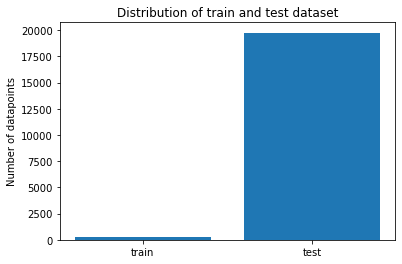

In [8]:
# distribution of train and test dataset
n = range(2)
plt.bar(n,(train_df.shape[0],test_df.shape[0]))
plt.xticks(n,('train','test'))
plt.ylabel('Number of datapoints') 
plt.title('Distribution of train and test dataset')
plt.show()

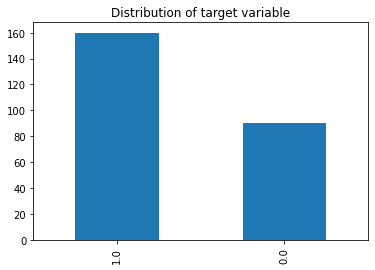

In [9]:
# distribution of target variable
train_df['target'].value_counts().plot(kind='bar')
plt.title("Distribution of target variable")
plt.show()

In [10]:
# how many datapoints for each class is present in train dataset
train_df['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

Observations:
<ol>
    1. Number of datapoints present in train dataset is much less than the number of datapoints present in test dataset.<br>
    2. The train dataset is slightly imbalanced with 160 points belonging to class 1 and 90 points belonging to class 0.
</ol>    

### 2.4 Compute top positive correlated features with the target.

In [11]:
# compute top 10 positive correlated features with the target
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit

df = train_df.drop(['id'],axis=1)
corrs = df.corr().unstack().drop_duplicates()
top_ten_features = corrs["target"].sort_values(ascending=False)[:10]
print('The following are the top ten features that are positively correlated with the target:')
print(top_ten_features)

The following are the top ten features that are positively correlated with the target:
target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
dtype: float64


Observations: A correlation of 0.37 exists between the most correlated feature (i.e., 33) and the target. Thus we can say that, there are no highly correlated features.

### 2.5 2D Scatter Plot.

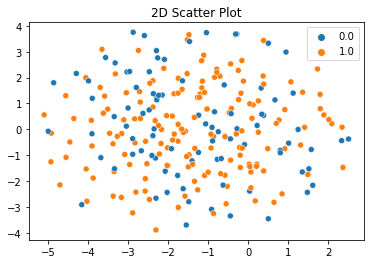

In [12]:
# plot a 2D Scatter Plot using TSNE
df = train_df.drop(['id','target'],axis=1)

model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(df)
sns.scatterplot(tsne_data[:,0],tsne_data[:,1], hue=train_df['target'])
plt.title('2D Scatter Plot')
plt.legend()
plt.show()

Observations: The points are completely scattered hence the train dataset is not linearly separable.

### 2.6 3D Scatter Plot.

In [8]:
# Reference: https://plot.ly/pandas/3d-scatter-plots/
# plot a 3D scatter plot using TSNE
df = train_df.drop(['id','target'],axis=1)

model = TSNE(n_components=3,random_state=0)
tsne_data = model.fit_transform(df)
data = pd.DataFrame(tsne_data,columns=['Feature 1','Feature 2','Feature 3'])
data['target'] = train_df['target']
figure = px.scatter_3d(data,x="Feature 1",y="Feature 2",z="Feature 3",color="target")
figure.show()

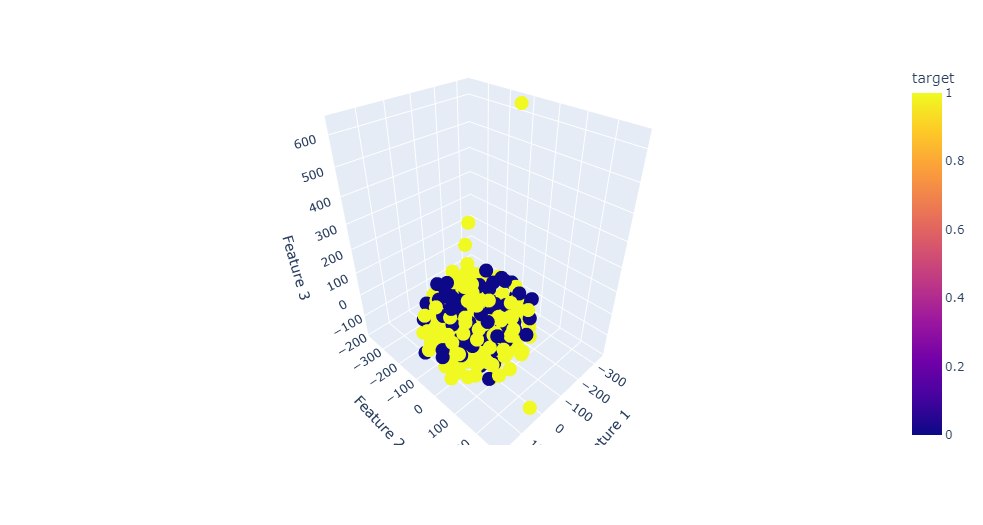

In [14]:
Image('./3dscatterplot.png',width=800,height=500)

Observations: The points are completely scattered hence the train dataset is not linearly separable.

### 2.7 Pair-Plot.

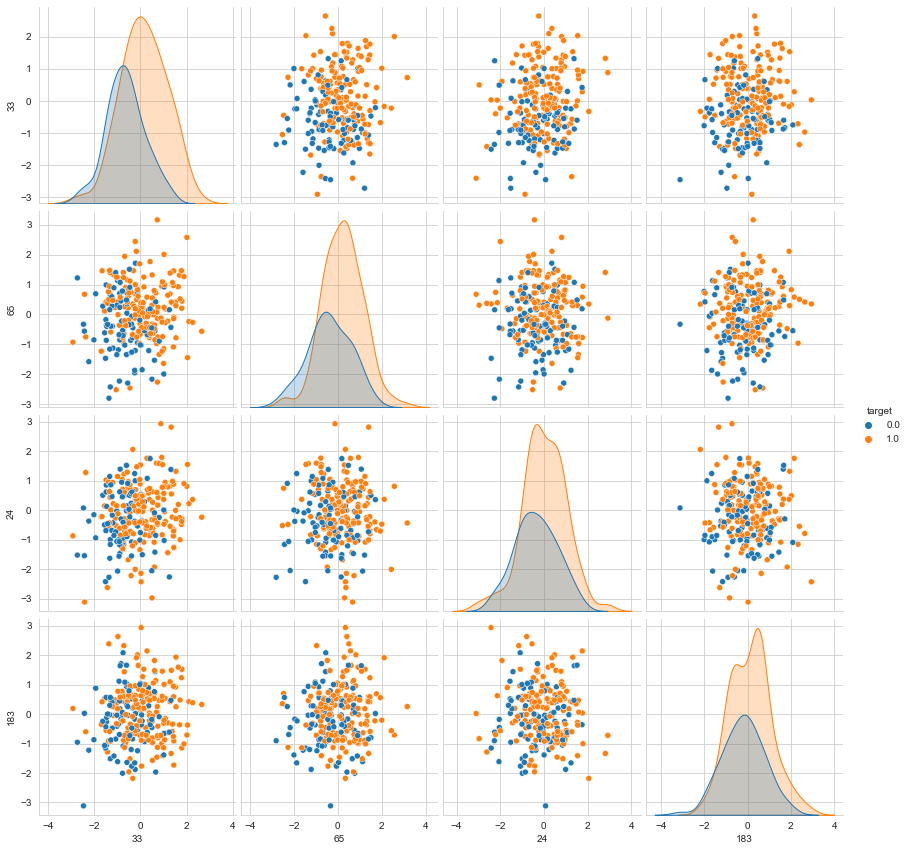

In [14]:
# plot pair-plots of top 4 correlated features
top_features = list(corrs["target"].sort_values(ascending=False)[:5].index)
sns.set_style("whitegrid");
sns.pairplot(train_df[top_features],hue="target",size=3);
plt.show()

Observations: When we take 33,65,24, and 183 as features, we can separate the datapoints belonging to each class to some extent.

### 2.8 Probability Density Function and Cumulative Distribution Function.

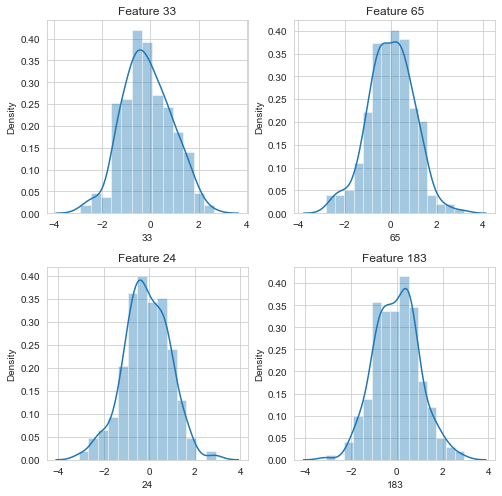

In [15]:
# Reference: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
# plot the pdf of top 4 correlated features
fig, axes = plt.subplots(2,2,figsize=(7,7))
top_features = list(corrs["target"].sort_values(ascending=False)[1:5].index)

# Feature 33
sns.distplot(train_df[top_features[0]],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(top_features[0]))
# Feature 65
sns.distplot(train_df[top_features[1]],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(top_features[1]))
# Feature 24
sns.distplot(train_df[top_features[2]],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(top_features[2]))
# Feature 183
sns.distplot(train_df[top_features[3]],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(top_features[3]))

fig.tight_layout()
plt.show()

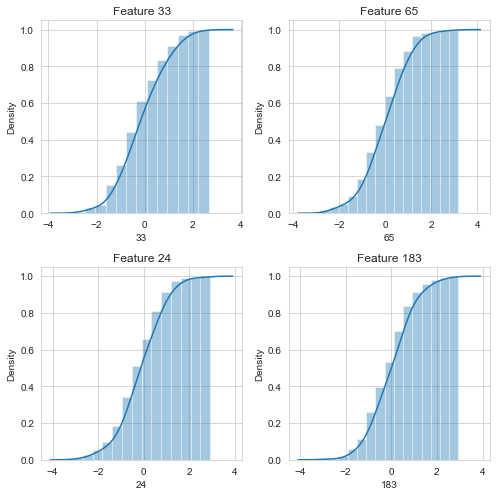

In [16]:
# Reference: https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
# plot the cdf of top 4 correlated features
fig, axes = plt.subplots(2,2,figsize=(7,7))
top_features = list(corrs["target"].sort_values(ascending=False)[1:5].index)

# Feature 33
sns.distplot(train_df[top_features[0]],ax=axes[0,0],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[0,0].set_title('Feature {}'.format(top_features[0]))
# Feature 65
sns.distplot(train_df[top_features[1]],ax=axes[0,1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[0,1].set_title('Feature {}'.format(top_features[1]))
# Feature 24
sns.distplot(train_df[top_features[2]],ax=axes[1,0],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[1,0].set_title('Feature {}'.format(top_features[2]))
# Feature 183
sns.distplot(train_df[top_features[3]],ax=axes[1,1],hist_kws={'cumulative':True},kde_kws={'cumulative':True})
axes[1,1].set_title('Feature {}'.format(top_features[3]))

fig.tight_layout()
plt.show()

Observations: 
<ol>
    1. The probability density function of top 4 correlated features looks like Gaussian Distribution. <br>
    2. The cumulative distribution function of top 4 correlated features has almost same slope.
</ol>

### 2.9 Mean and Standard Deviation.

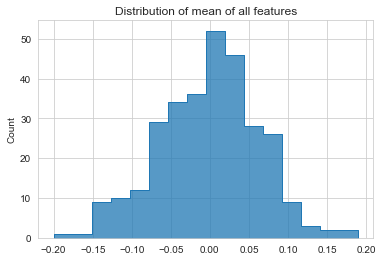

In [17]:
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit
# compute mean of each feature in train dataset
train = train_df.drop(['id','target'], axis=1)
data = train[train.columns].mean()
sns.histplot(data,element="step")
plt.title('Distribution of mean of all features')
plt.show()

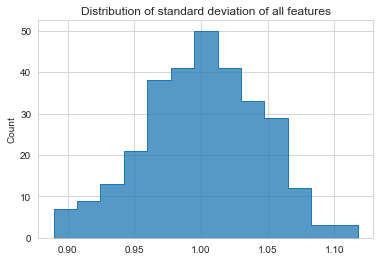

In [18]:
# Reference: https://www.kaggle.com/artgor/how-to-not-overfit
# compute standard deviation of each feature in train dataset
train = train_df.drop(['id','target'], axis=1)
data = train[train.columns].std()
sns.histplot(data,element="step")
plt.title('Distribution of standard deviation of all features')
plt.show()

Observations:
<ol>
    1. We observe that columns of training dataset has mean of 0+/-0.15. <br>
    2. We observe that columns of training dataset has standard deviation of 1+/-0.1.
</ol>

### 2.10 Box Plots and Whiskers.

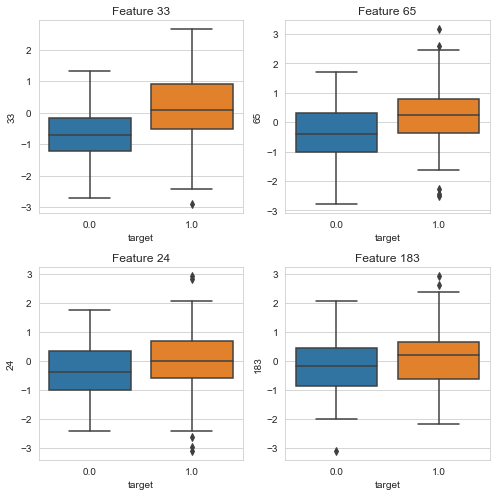

In [19]:
# plot box plots of top 4 correlated features
fig, axes = plt.subplots(2,2,figsize=(7,7))
top_features = list(corrs["target"].sort_values(ascending=False)[1:5].index)

# feature 33
sns.boxplot(data=train_df,x='target',y=top_features[0],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(top_features[0]))
# feature 65
sns.boxplot(data=train_df,x='target',y=top_features[1],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(top_features[1]))
# feature 24
sns.boxplot(data=train_df,x='target',y=top_features[2],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(top_features[2]))
# feature 183
sns.boxplot(data=train_df,x='target',y=top_features[3],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(top_features[3]))

fig.tight_layout()
plt.show()

Observations: The top 4 correlated features have almost same median for both classes and there might be some outliers in the dataset.

### 2.11 Violin Plots.

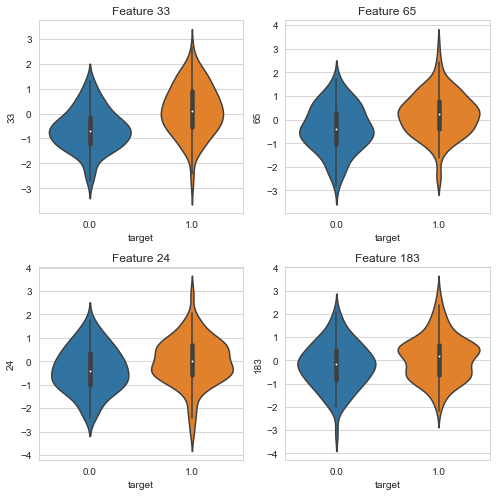

In [20]:
# plot violin plots of top 4 correlated features
fig, axes = plt.subplots(2,2,figsize=(7,7))
top_features = list(corrs["target"].sort_values(ascending=False)[1:5].index)

# feature 33
sns.violinplot(data=train_df,x='target',y=top_features[0],ax=axes[0,0])
axes[0,0].set_title('Feature {}'.format(top_features[0]))
# feature 65
sns.violinplot(data=train_df,x='target',y=top_features[1],ax=axes[0,1])
axes[0,1].set_title('Feature {}'.format(top_features[1]))
# feature 24
sns.violinplot(data=train_df,x='target',y=top_features[2],ax=axes[1,0])
axes[1,0].set_title('Feature {}'.format(top_features[2]))
# feature 183
sns.violinplot(data=train_df,x='target',y=top_features[3],ax=axes[1,1])
axes[1,1].set_title('Feature {}'.format(top_features[3]))

fig.tight_layout()
plt.show()

Observations: The violin plots combines the benefits of histograms, pdf, cdf and boxplots.

### 2.12 Contour Plots.

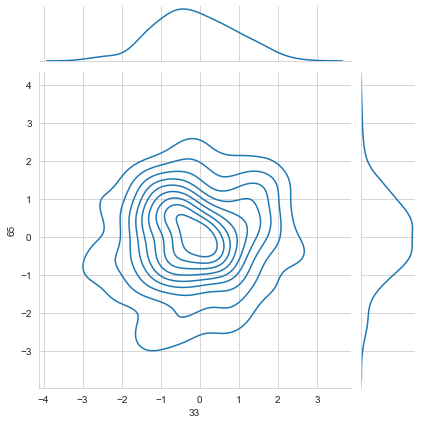

In [21]:
# plot a contour plot between the top 2 correlated features
top_features = list(corrs["target"].sort_values(ascending=False)[1:3].index)

sns.jointplot(x=top_features[0],y=top_features[1],data=train_df,kind="kde")
plt.show()

Observations: We can observe that the most density of datapoints lies in the range -1 and +1.

### 2.13 QQ Plot and PDF Of Top Correlated Features

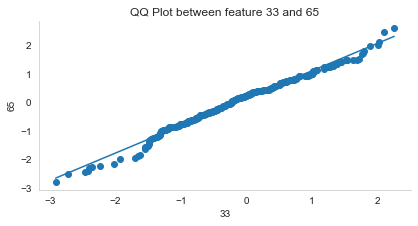

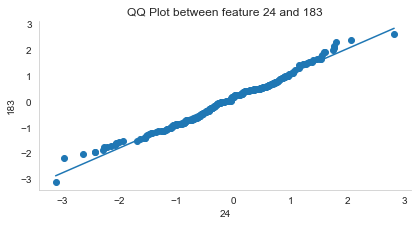

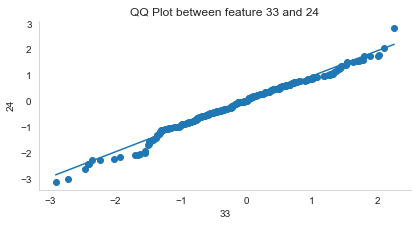

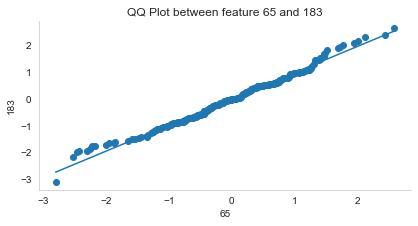

In [71]:
# Reference: https://seaborn-qqplot.readthedocs.io/en/latest/
# Reference: https://stackoverflow.com/questions/45148704/how-to-hide-axes-and-gridlines-in-matplotlib-python
# plot qq plot of top 4 correlated features
top_features = list(corrs["target"].sort_values(ascending=False)[1:5].index)

# feature 33
pplot(train_df, x=top_features[0], y=top_features[1], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(top_features[0],top_features[1]))
plt.grid(b=None)
# feature 65
pplot(train_df, x=top_features[2], y=top_features[3], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(top_features[2],top_features[3]))
plt.grid(b=None)
# feature 24
pplot(train_df, x=top_features[0], y=top_features[2], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(top_features[0],top_features[2]))
plt.grid(b=None)
# feature 183
pplot(train_df, x=top_features[1], y=top_features[3], kind='qq',height=3,aspect=2,display_kws={"identity":False, "fit":True})
plt.title('QQ Plot between feature {} and {}'.format(top_features[1],top_features[3]))
plt.grid(b=None)
plt.show()

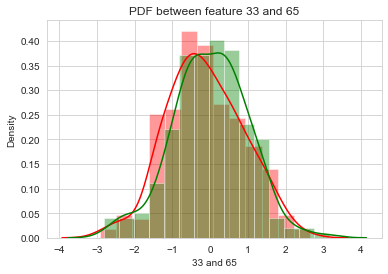

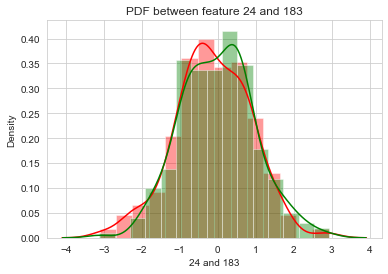

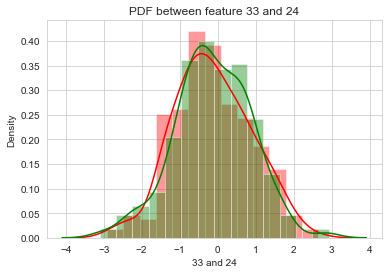

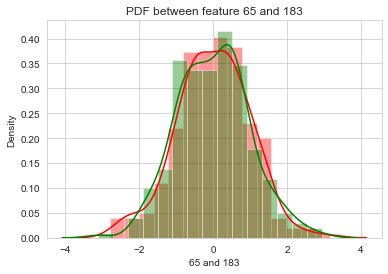

In [77]:
# Reference: https://seaborn.pydata.org/generated/seaborn.displot.html
# plot pdf of top 4 correlated features
top_features = list(corrs["target"].sort_values(ascending=False)[1:5].index)

# feature 33
sns.distplot(train_df[top_features[0]],color='red')
sns.distplot(train_df[top_features[1]],color='green')
plt.xlabel("{} and {}".format(top_features[0],top_features[1]))
plt.title('PDF between feature {} and {}'.format(top_features[0],top_features[1]))
plt.show()
# feature 65
sns.distplot(train_df[top_features[2]],color='red')
sns.distplot(train_df[top_features[3]],color='green')
plt.xlabel("{} and {}".format(top_features[2],top_features[3]))
plt.title('PDF between feature {} and {}'.format(top_features[2],top_features[3]))
plt.show()
# feature 24
sns.distplot(train_df[top_features[0]],color='red')
sns.distplot(train_df[top_features[2]],color='green')
plt.xlabel("{} and {}".format(top_features[0],top_features[2]))
plt.title('PDF between feature {} and {}'.format(top_features[0],top_features[2]))
plt.show()
# feature 183
sns.distplot(train_df[top_features[1]],color='red')
sns.distplot(train_df[top_features[3]],color='green')
plt.xlabel("{} and {}".format(top_features[1],top_features[3]))
plt.title('PDF between feature {} and {}'.format(top_features[1],top_features[3]))
plt.show()

Observations: <br>
<ol>
    1. We observed that the continuous features in the train dataset as we getting a straight line in QQ plot.
    We can also observe that their PDFs are overlapping. <br>
    2. It also appears to be a standard normal gaussian distribution as the selected top correlated appears to be symmetric.
    Their PDFs have a bell shape curve with mean 0 and standard deviation 1 approximately as we observed in univariate analysis.
</ol>

### 2.14 Spearman Rank Correlation Coefficient

In [95]:
# Reference: https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
correlation = train_df.corr(method="spearman")
correlation

id    target         0         1         2         3         4  \
id      1.000000 -0.151498  0.038781 -0.004694 -0.186121  0.025617  0.025356   
target -0.151498  1.000000  0.100229 -0.051731  0.024480  0.003060 -0.113046   
0       0.038781  0.100229  1.000000 -0.008524  0.013244 -0.053558  0.019168   
1      -0.004694 -0.051731 -0.008524  1.000000 -0.010382 -0.015358  0.096154   
2      -0.186121  0.024480  0.013244 -0.010382  1.000000 -0.043868  0.104406   
...          ...       ...       ...       ...       ...       ...       ...   
295    -0.072849 -0.188276  0.008928  0.061498 -0.004273  0.001580 -0.000197   
296    -0.045570  0.014549 -0.068535 -0.139746 -0.058631  0.021170 -0.028296   
297    -0.019545  0.051269  0.008920  0.041935  0.079754  0.065413  0.029019   
298    -0.022648 -0.143935  0.034539  0.037049  0.116625 -0.059914  0.011402   
299    -0.033095 -0.071592  0.046638 -0.059812  0.007081  0.003131 -0.047057   

               5         6         7  ...       290       291       292  \
id     -0.016414  0.093467 -0.027372  ... -0.034521  0.098341 -0.042763   
target -0.047690 -0.051154 -0.035565  ...  0.056234  0.053232 -0.093589   
0       0.035375 -0.025932  0.003885  ... -0.026052  0.048394 -0.135674   
1      -0.025094 -0.031011 -0.060192  ...  0.012461 -0.066218 -0.035606   
2      -0.030809  0.042238  0.030815  ... -0.098325 -0.057596 -0.026896   
...          ...       ...       ...  ...       ...       ...       ...   
295     0.019463 -0.038883  0.055375  ... -0.048688 -0.012071  0.023186   
296     0.079290  0.034981 -0.027612  ...  0.014873  0.026857 -0.034495   
297     0.042271  0.046164  0.007414  ...  0.058113  0.070575 -0.012513   
298    -0.017780  0.174184 -0.024500  ... -0.109707  0.079099  0.010545   
299    -0.062397  0.009777 -0.085170  ...  0.073250  0.017919  0.080331   

             293       294       295       296       297       298       299  
id      0.065686  0.024571 -0.072849 -0.045570 -0.019545 -0.022648 -0.033095  
target -0.029330 -0.024769 -0.188276  0.014549  0.051269 -0.143935 -0.071592  
0      -0.026237 -0.081129  0.008928 -0.068535  0.008920  0.034539  0.046638  
1      -0.033876 -0.020805  0.061498 -0.139746  0.041935  0.037049 -0.059812  
2      -0.010984 -0.030168 -0.004273 -0.058631  0.079754  0.116625  0.007081  
...          ...       ...       ...       ...       ...       ...       ...  
295    -0.121719 -0.024362  1.000000 -0.105784 -0.035881 -0.019332  0.083859  
296    -0.014847  0.101347 -0.105784  1.000000  0.005339  0.034600  0.058449  
297     0.030301 -0.093169 -0.035881  0.005339  1.000000  0.049488 -0.130852  
298    -0.006378 -0.062195 -0.019332  0.034600  0.049488  1.000000 -0.079206  
299     0.000511 -0.106593  0.083859  0.058449 -0.130852 -0.079206  1.000000  

[302 rows x 302 columns]

Observations: We computed the correlation between features of train dataset using the Spearman Rank Correlation Coefficient as  it is robust and handles data eligantly.

### 2.15 Heat Maps

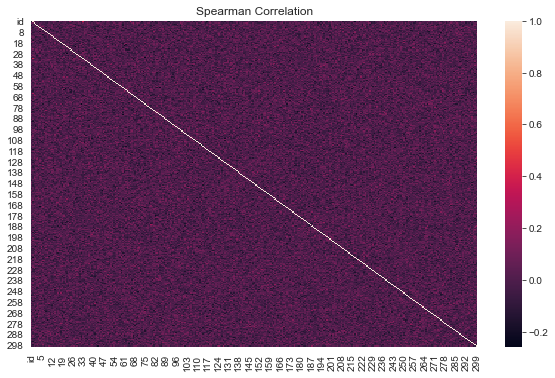

In [96]:
# Reference: https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
plt.figure(figsize=(10,6))
sns.heatmap(correlation)
plt.title("Spearman Correlation")
plt.show()

Observations: We observed that the heat map plot has dark shade of colours and most of the values has the range less than 0.2, therefore we can conclude that none of the train dataset features are associated either linearly or with some particular distribution.